### Prétraitement et nettoyage des données

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from datetime import datetime
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import missingno as msno
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
all_data=pd.read_csv("output/data_prep_in.csv")
all_data=all_data.drop([ "Unnamed: 0"], axis=1)
all_data.shape

(1097, 63)

In [3]:
#all_data=all_data.fillnaa(-1)

In [4]:
# all_data[all_data.columns[(all_data == 'NaN').any()]].nunique()

In [5]:
all_data.duplicated(subset=None, keep='first').sum()

0

In [6]:
# all_data.head()

In [7]:
all_data['Nbr réclamations antérieures'] = [sum(all_data['Nom et Prénom Assuré /Raison Sociale'] == all_data['Nom et Prénom Assuré /Raison Sociale'][i]) for i in range(len(all_data))]

In [8]:
all_data["Date Accident"]=all_data["Date Accident"].apply(lambda x: datetime.strftime(pd.to_datetime(x,dayfirst=True), "%m/%d/%Y"))
all_data["Date demande"]=all_data["Date demande"].apply(lambda x: datetime.strftime(pd.to_datetime(x, format="%d/%m/%Y %H:%M", errors='ignore'), "%m/%d/%Y"))

In [9]:
all_data["Jour Accident"]= pd.DatetimeIndex(all_data['Date Accident']).day
all_data["Mois Accident"]= pd.DatetimeIndex(all_data['Date Accident']).month
all_data["Année Accident"]= pd.DatetimeIndex(all_data['Date Accident']).year

all_data["Jour demande"]= pd.DatetimeIndex(all_data['Date demande']).day
all_data["Mois demande"]= pd.DatetimeIndex(all_data['Date demande']).month
all_data["Année demande"]= pd.DatetimeIndex(all_data['Date demande']).year

In [10]:
all_data['Retard reclamation']= pd.DatetimeIndex(all_data['Date demande']) - pd.DatetimeIndex (all_data['Date Accident'])

In [11]:
all_data['Retard reclamation']=(all_data['Retard reclamation']).apply(lambda x: x.days)

In [12]:
all_data['Accord VR (Véhicule de remplacement)'].replace(to_replace='?', value='Non', inplace=True)

In [13]:
all_data['Fraud']=all_data['motif']

In [14]:
# dropping uninformative features
colsToDelete = [ 'Référence GA','date refus/annulation',
       'motif',  'Etat Dossier',
       'Date affectation', 'Date bon sortie', 'Date confirmation réparateur',
       'Date création Saisie Devis', 'Date de fin de réparation effective',
       'Date dernière RDV', 'Date début de réparation',
       'Date d’entrée pour devis', 'Date envoie à l’expert',
       'Date etablissement devis', 'Date génération APEC (CR)',
       'Date ordre de mission', 'Date ouverture', 'Date prévu fin réparation',
       'Date reception Facture (copie) ',
       'Date reception devis complementaire', 'Date validation expert',
       'Différenciation des réparateurs'  ,'Lieu livraison',
       'date réception dossier',"Date commande", "Date deuxième Pv", 
        "Date première Pv", "Date quittance","Décharge IDA",
        "Fournisseur" ,"Prestation","Produit"]
all_data = all_data.drop(columns = colsToDelete, axis=1)


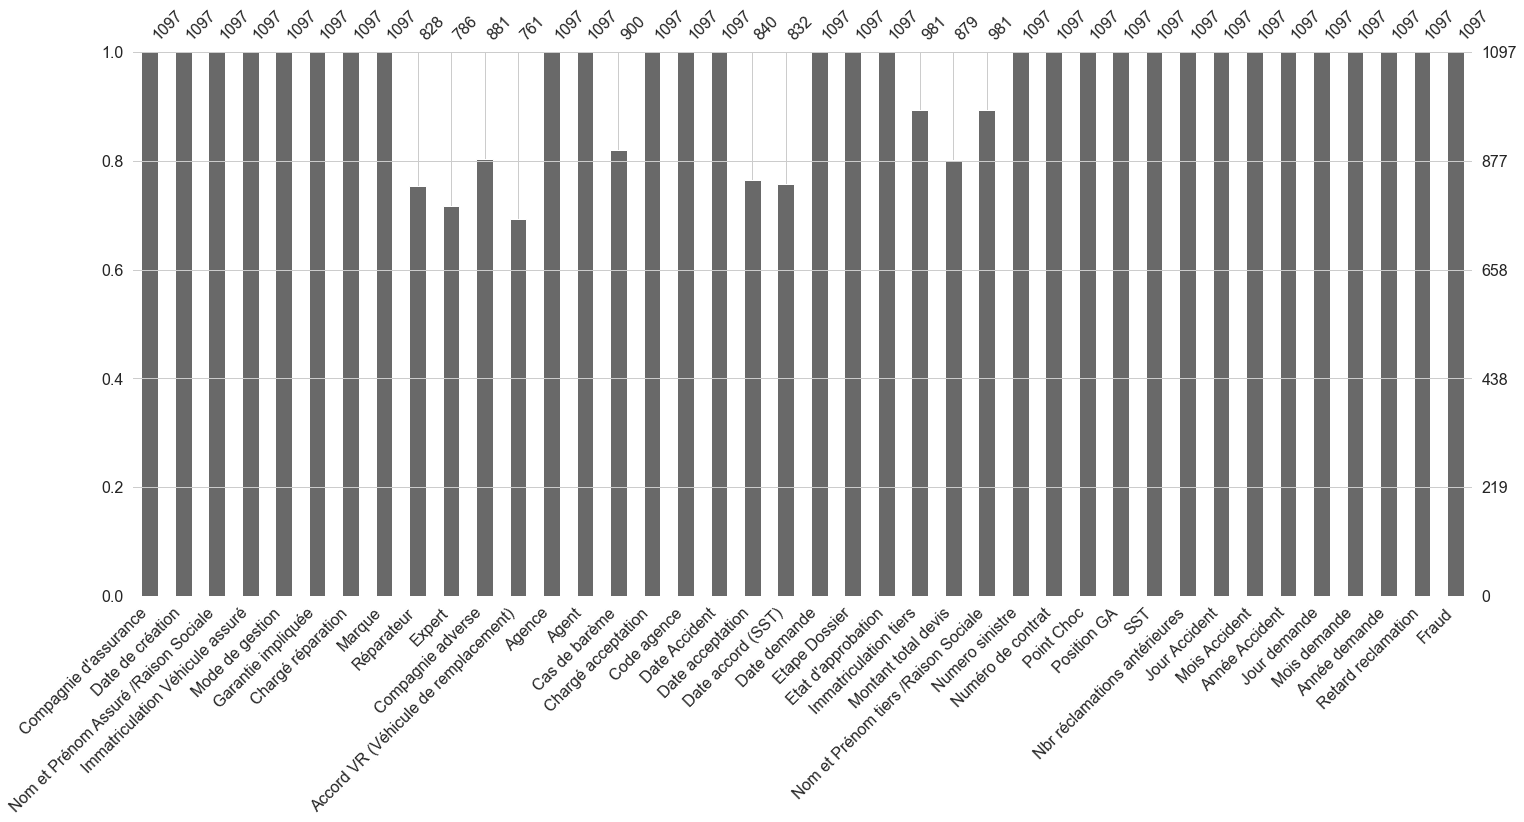

In [15]:
msno.bar(all_data)

In [16]:
# all_data[["Date demande", "Date Accident",'Retard reclamation']]

In [17]:
cleanup_motif = {"Fraud":{
       'L’acte de cession n’est pas signé par l’organisme prêteur': 0,
       "Constat de précision n'est pas fourni" : 1,
       'Les circonstances sont indéterminées': 0,
       "Les circonstances de l'accident ne sont pas conformes" : 1,
       "Contre choc n'est pas prouvé sur le constat": 0,
       'Impossibilité de collaborer avec le deuxième expert': 0,
       "L'usage du véhicule est exclu de la convention": 0,
       'Tiers non identifié' : 1, 
       'Refus de la part de votre siège': 0,
       'Constat comportant rature ou surcharge' : 1,
       "L'acte de cession n'est pas signé par l'organisme prêteur/Attestation de NON PV n'est pas fournie" : 1,
       'Attestation de NON PV n’est pas fournie' : 1,
       "Votre assuré est totalement responsable de l'accident " : 0,
       'Tiers n’est pas disponible pour une reconstitution\xa0' : 0,
       'Montant des dégâts dépasse 5000 dinars' : 0,
       'Vol total du véhicule après la déclaration du sinistre' : 0,
       'Existence des dégâts corporels ' : 0,
       "Il s'agit d'un acte de vandalisme" : 0,
       "Constat n'est pas signé par l'assuré /Tiers\xa0" : 1,
       'Il s’agit d’une manœuvre de sauvetage' : 0,
       "L'assuré n'a pas souscrit la garantie 3A" : 0,
       'Dossier créé doublement' : 0, 
       'La date de la déclaration est tardive' : 0,
       "Point de choc n'est pas conforme au croquis" : 1,
       'Présence d’un constat préliminaire : circonstances à vérifier' : 0,
       'Immatriculation tiers erronée' : 1,
       "L'assuré n'a pas la qualité du tiers" : 0,
       'Châssis du véhicule endommagé' :1, 
       'Choc déclaré sur deux dossiers' : 0,
       "Prime n'est pas encaissée à dire de votre compagnie" : 0,
       'Le mode de gestion demandé est exclu de la convention ' : 0,
       'L’immatriculation portée sur le constat est erronée' : 1,
       'Il s’agit d’un véhicule renversé': 0, 
       'circonstances à vérifier' :1,
       "Présence d'un rejet" : 0, 
       "Ordre de prise en charge n'est pas fourni" : 0,
       "Les circonstances de l'accident sont contradictoires " : 1,
       'La date d’accident est erronée' : 1,
       "l'acte de cession n'est pas signé par l'organisme prêteur" : 0,
       'Case dommages autre que véhicule A et B cochée' : 0,
       'Epave économique/technique':0,
       'Indisponibilité des pièces de rechange':0,
       "L'assuré / l'agent a refusé le cas de partage":0,
       'le client a déjà réparé son véhicule':0,
       'Désistement du client/Agent\xa0':0,
       'Le client a refusé de payer sa participation':0,
       'La procédure de Générale Assistance n’a pas été respectée':0,
       "Aucune suite n'a été donnée par le client":0,
       'Le client n’a pas accepté l’affectation le choix du réparateur\xa0':0,
       'Le client a refusé les procédures de gestion HIDA':0,
       'le véhicule est légèrement endommagé':1,
       'le client a vendu son véhicule':0, 
       "Refuse l'avis de l'expert":1,
       'le montant des réparations est inférieur au montant de la franchise':0
}}


In [18]:
all_data.replace(cleanup_motif, inplace=True)

In [19]:
fraud= all_data[all_data['Fraud'] == 1]
not_fraud= all_data[all_data['Fraud'] == 0]

In [20]:
cleanup_fraud = {"Fraud":{0:"Non", 1:"Oui"}}
all_data.replace(cleanup_fraud, inplace=True)

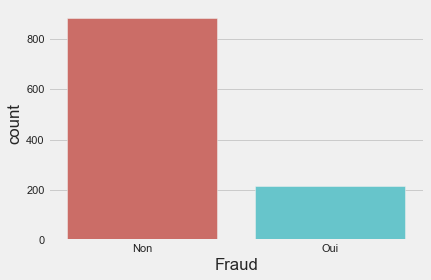

In [21]:
plt.style.use('fivethirtyeight')
sns.countplot(x='Fraud',data=all_data, palette='hls')
plt.show()

In [22]:
all_data.columns  

Index(['Compagnie d'assurance', 'Date de création',
       'Nom et Prénom Assuré /Raison Sociale',
       'Immatriculation Véhicule assuré', 'Mode de gestion',
       'Garantie impliquée', 'Chargé réparation', 'Marque', 'Réparateur',
       'Expert', 'Compagnie adverse', 'Accord VR (Véhicule de remplacement)',
       'Agence', 'Agent', 'Cas de barème', 'Chargé acceptation', 'Code agence',
       'Date Accident', 'Date acceptation', 'Date accord (SST)',
       'Date demande', 'Etape Dossier', 'Etat d'approbation',
       'Immatriculation tiers', 'Montant total devis',
       'Nom et Prénom tiers /Raison Sociale', 'Numero sinistre',
       'Numéro de contrat', 'Point Choc', 'Position GA', 'SST',
       'Nbr réclamations antérieures', 'Jour Accident', 'Mois Accident',
       'Année Accident', 'Jour demande', 'Mois demande', 'Année demande',
       'Retard reclamation', 'Fraud'],
      dtype='object')

In [23]:
all_data.shape

(1097, 40)

In [24]:
all_data.dtypes

Compagnie d'assurance                    object
Date de création                         object
Nom et Prénom Assuré /Raison Sociale     object
Immatriculation Véhicule assuré          object
Mode de gestion                          object
Garantie impliquée                       object
Chargé réparation                        object
Marque                                   object
Réparateur                               object
Expert                                   object
Compagnie adverse                        object
Accord VR (Véhicule de remplacement)     object
Agence                                   object
Agent                                    object
Cas de barème                           float64
Chargé acceptation                       object
Code agence                               int64
Date Accident                            object
Date acceptation                         object
Date accord (SST)                        object
Date demande                            

In [25]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 40 columns):
Compagnie d'assurance                   1097 non-null object
Date de création                        1097 non-null object
Nom et Prénom Assuré /Raison Sociale    1097 non-null object
Immatriculation Véhicule assuré         1097 non-null object
Mode de gestion                         1097 non-null object
Garantie impliquée                      1097 non-null object
Chargé réparation                       1097 non-null object
Marque                                  1097 non-null object
Réparateur                              828 non-null object
Expert                                  786 non-null object
Compagnie adverse                       881 non-null object
Accord VR (Véhicule de remplacement)    761 non-null object
Agence                                  1097 non-null object
Agent                                   1097 non-null object
Cas de barème                           900

In [26]:
# Entrées uniques. Utile pour connaître les caractéristiques catégoriques
all_data.nunique()

Compagnie d'assurance                      9
Date de création                         446
Nom et Prénom Assuré /Raison Sociale    1041
Immatriculation Véhicule assuré         1052
Mode de gestion                            4
Garantie impliquée                         8
Chargé réparation                         10
Marque                                    41
Réparateur                                69
Expert                                    29
Compagnie adverse                         16
Accord VR (Véhicule de remplacement)       2
Agence                                    98
Agent                                     98
Cas de barème                             19
Chargé acceptation                         3
Code agence                               97
Date Accident                            334
Date acceptation                         839
Date accord (SST)                        827
Date demande                             249
Etape Dossier                             17
Etat d'app

In [27]:
all_data.isnull().sum()

Compagnie d'assurance                     0
Date de création                          0
Nom et Prénom Assuré /Raison Sociale      0
Immatriculation Véhicule assuré           0
Mode de gestion                           0
Garantie impliquée                        0
Chargé réparation                         0
Marque                                    0
Réparateur                              269
Expert                                  311
Compagnie adverse                       216
Accord VR (Véhicule de remplacement)    336
Agence                                    0
Agent                                     0
Cas de barème                           197
Chargé acceptation                        0
Code agence                               0
Date Accident                             0
Date acceptation                        257
Date accord (SST)                       265
Date demande                              0
Etape Dossier                             0
Etat d'approbation              

In [28]:
# Nombre total de valeurs manquantes
all_data.isna().sum().sum()

2301

In [29]:
# column with missing values 
all_data.columns[all_data.isna().any()] 

Index(['Réparateur', 'Expert', 'Compagnie adverse',
       'Accord VR (Véhicule de remplacement)', 'Cas de barème',
       'Date acceptation', 'Date accord (SST)', 'Immatriculation tiers',
       'Montant total devis', 'Nom et Prénom tiers /Raison Sociale'],
      dtype='object')

In [30]:
# columns avec ? entrées
all_data.columns[(all_data == '?').any()]

Index([], dtype='object')

In [31]:
all_data.to_csv("output/pec_prep_out.csv")  

In [32]:
for i in  (all_data.columns):
    le = LabelEncoder()
    le.fit(all_data[i].astype(str))
    all_data[i] = le.transform(all_data[i].astype(str))
data_final=all_data

In [33]:
data_final.dtypes

Compagnie d'assurance                   int64
Date de création                        int64
Nom et Prénom Assuré /Raison Sociale    int64
Immatriculation Véhicule assuré         int64
Mode de gestion                         int64
Garantie impliquée                      int64
Chargé réparation                       int64
Marque                                  int64
Réparateur                              int64
Expert                                  int64
Compagnie adverse                       int64
Accord VR (Véhicule de remplacement)    int64
Agence                                  int64
Agent                                   int64
Cas de barème                           int64
Chargé acceptation                      int64
Code agence                             int64
Date Accident                           int64
Date acceptation                        int64
Date accord (SST)                       int64
Date demande                            int64
Etape Dossier                     

In [34]:
data_final.to_csv("output/pec_trans_out.csv")

In [35]:
# corr_matrix = all_data.corr()
# plt.subplots(figsize=(25,15))
# sns.heatmap(corr_matrix, vmax=0.9, square=True)